# Lab Assignment: Implementing CNN on the Fashion-MNIST Dataset
Objective: In this lab, you will implement a Convolutional Neural Network (CNN) using the Intel Image Classification dataset. Your task is to train a CNN model to classify these images with high accuracy.

# 1. Dataset Overview

In [3]:
!unzip /content/archive.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/seg_train/seg_train/mountain/7506.jpg  
  inflating: /content/seg_train/seg_train/mountain/7537.jpg  
  inflating: /content/seg_train/seg_train/mountain/7539.jpg  
  inflating: /content/seg_train/seg_train/mountain/7551.jpg  
  inflating: /content/seg_train/seg_train/mountain/7560.jpg  
  inflating: /content/seg_train/seg_train/mountain/7565.jpg  
  inflating: /content/seg_train/seg_train/mountain/7578.jpg  
  inflating: /content/seg_train/seg_train/mountain/7581.jpg  
  inflating: /content/seg_train/seg_train/mountain/7586.jpg  
  inflating: /content/seg_train/seg_train/mountain/7647.jpg  
  inflating: /content/seg_train/seg_train/mountain/7652.jpg  
  inflating: /content/seg_train/seg_train/mountain/7654.jpg  
  inflating: /content/seg_train/seg_train/mountain/7662.jpg  
  inflating: /content/seg_train/seg_train/mountain/767.jpg  
  inflating: /content/seg_train/seg_train/mountain/7672.jpg  
  inflating: /conten

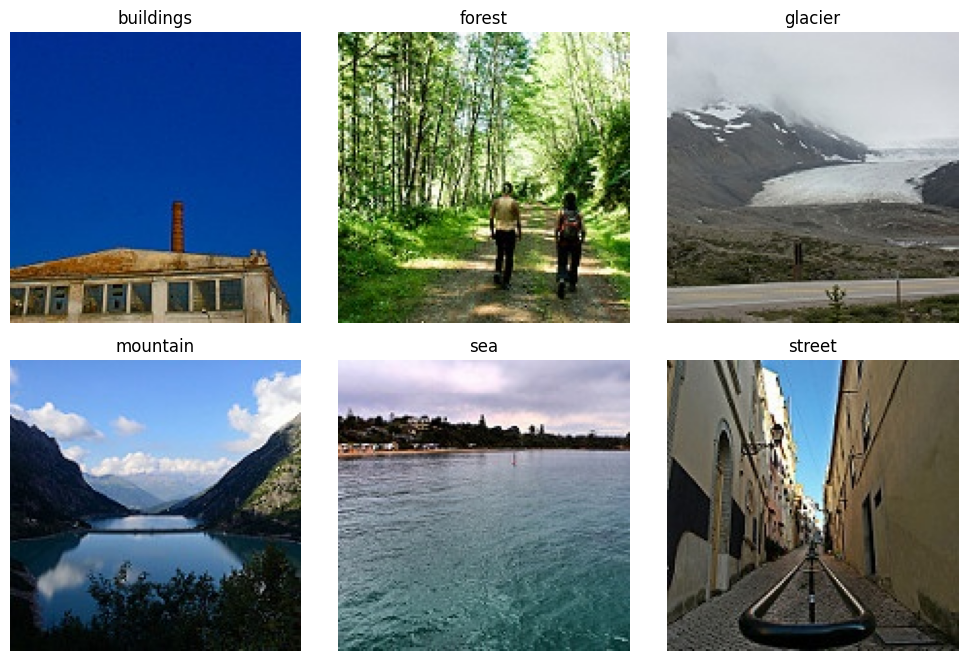

In [6]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Set the path to the dataset
train_path = '/content/seg_train/seg_train'
categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Visualize a few samples
def visualize_samples(train_path, categories):
    plt.figure(figsize=(10, 10))

    for i, category in enumerate(categories):
        # Construct the path for each category
        img_path = os.path.join(train_path, category)

        # Check if the category directory exists and is not empty
        if os.path.exists(img_path) and len(os.listdir(img_path)) > 0:
            img_file = os.listdir(img_path)[0]  # Get the first image file
            img = cv2.imread(os.path.join(img_path, img_file))  # Read the image using OpenCV

            # Check if the image is successfully loaded
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (OpenCV uses BGR by default)

                # Plot the image in a grid
                plt.subplot(3, 3, i+1)
                plt.imshow(img)
                plt.title(category)
                plt.axis('off')
            else:
                print(f"Error loading image {img_file} in category {category}")
        else:
            print(f"No images found in category: {category}")

    plt.tight_layout()  # Adjust the layout to avoid overlap
    plt.show()

# Call the function to visualize samples
visualize_samples(train_path, categories)


# 2. Model Architecture

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the model architecture
def create_cnn_model(input_shape=(150, 150, 3), num_classes=6):
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Second convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Third convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Create the model
cnn_model = create_cnn_model()
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       9,470,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,565,894 (36.49 MB)

 Trainable params: 9,565,446 (36.49 MB)

 Non-trainable params: 448 (1.75 KB)

# 3. Model Training

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.15, horizontal_flip=True, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(train_path, target_size=(150, 150), batch_size=32, class_mode='categorical', subset='training')
validation_generator = train_datagen.flow_from_directory(train_path, target_size=(150, 150), batch_size=32, class_mode='categorical', subset='validation')

# Train the model
history = cnn_model.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=5)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Epoch 1/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1040s 3s/step - accuracy: 0.5355 - loss: 1.2895 - val_accuracy: 0.6084 - val_loss: 1.0949
Epoch 2/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1051s 3s/step - accuracy: 0.5786 - loss: 1.1366 - val_accuracy: 0.6252 - val_loss: 1.0663
Epoch 3/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1079s 3s/step - accuracy: 0.6110 - loss: 1.0292 - val_accuracy: 0.5014 - val_loss: 1.3780
Epoch 4/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1051s 3s/step - accuracy: 0.5899 - loss: 1.0933 - val_accuracy: 0.3723 - val_loss: 12.9600
Epoch 5/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1078s 3s/step - accuracy: 0.6459 - loss: 0.9548 - val_accuracy: 0.7350 - val_loss: 0.8907


# 4. Evaluation

Found 3000 images belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 63s 662ms/step - accuracy: 0.7263 - loss: 1.0383
Test Accuracy: 72.60%


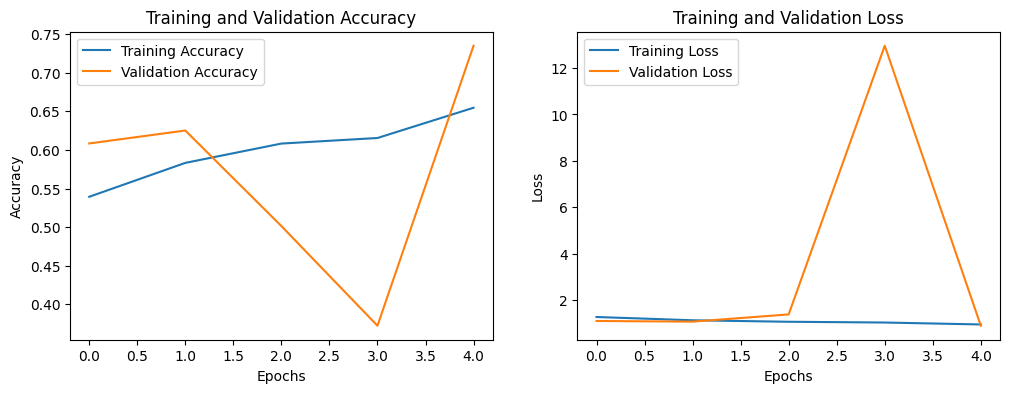

94/94 ━━━━━━━━━━━━━━━━━━━━ 50s 534ms/step


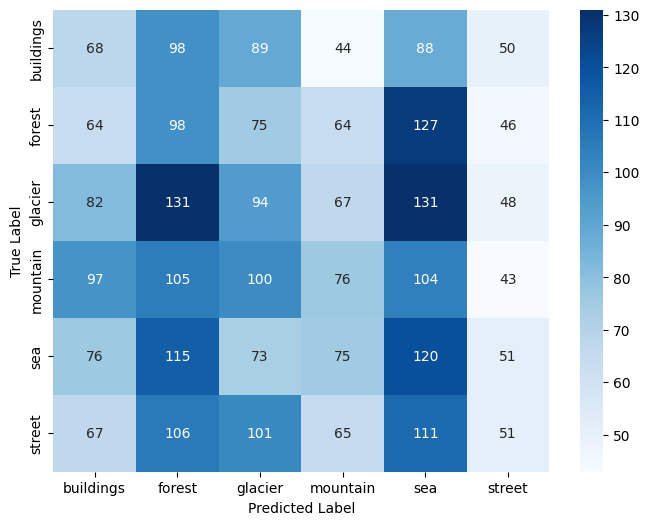

In [10]:
# Load test data
test_path = '/content/seg_test/seg_test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(150, 150), batch_size=32, class_mode='categorical')

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training & validation accuracy/loss curves
def plot_performance(history):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_performance(history)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = cnn_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# 5. Optimization

In [ ]:
# Adjust data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

# Fine-tune learning rate and batch size
cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train with fine-tuned hyperparameters
history = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=5, batch_size=64)


Epoch 1/5
302/351 ━━━━━━━━━━━━━━━━━━━━ 2:15 3s/step - accuracy: 0.7215 - loss: 0.7856